# Importing the packages

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from tqdm import tqdm
# import faiss
import numpy as np
# from mayavi.mlab import *

In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'1.12.0'

In [5]:
import sys
sys.path.insert(0, '../.')

In [6]:
from data.preprocessing import *

In [7]:
from model import *

In [8]:
from data.fv_utils import *

In [9]:
from Trainer import *

## Test the fv utils

In [9]:
# calib = Calibration('data/obj/training/calib/000000.txt')
# pc_velo = load_velo_scan('./data/obj/training/velodyne/000000.bin')
# img = load_image('./data/obj/training/image_2/000000.png')
# print(pc_velo.shape)
# result = show_lidar_on_image(pc_velo[:,0:3], img, calib, 1224, 370)

In [25]:
result.shape

(370, 1224, 32)

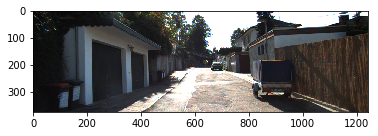

In [35]:
plt.imshow(img[:, :, ::-1])

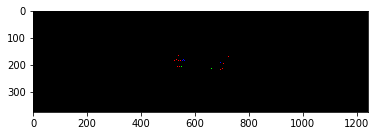

In [48]:
new_img = np.clip(np.sum(result, axis=2), 0, 1)
new_img = result[:, :, 15:18]
plt.imshow(new_img)
plt.show()

In [9]:
base_path = '/Users/apple/Desktop/Master/Data'

list_files = list(map(lambda x: x.split('.')[0], os.listdir(base_path+'/data_object_image_3/training/image_3')))
    
camera_paths = list(map(lambda x: base_path+'/data_object_image_3/training/image_3/' + x + '.png', list_files))
lidar_paths = list(map(lambda x: base_path+'/data_object_velodyne/training/velodyne/' + x + '.bin', list_files))
    # label_paths = list(map(lambda x: base_path + '/data_object_label/training/label_2/' + x + '.txt', list_files))
    # calib_paths = list(map(lambda x: base_path + '/calib/training/calib/' + x + '.txt', list_files))
label_paths = list(map(lambda x: base_path + '/training/label_2/' + x + '.txt', list_files))
calib_paths = list(map(lambda x: base_path + '/data_object_calib/training/calib/' + x + '.txt', list_files))

In [10]:
image_size=(370, 1224)
lidar_size=(512, 448, 32)
ln = int(len(list_files) * 0.8)
for camera_path, lidar_path, label_path, calib_path in zip(camera_paths[:ln], lidar_paths[:ln], label_paths[:ln], calib_paths[:ln]):
        camera_image, shift_h, shift_w = read_camera(camera_path, image_size)
        lidar_image = read_lidar(lidar_path, lidar_size)
        print('99')
        velo_front_view = read_pc_fv(calib_path, lidar_path)
        print(velo_front_view.shape)
        print('00')
        _, label, Tr_velo_to_cam, R0_rect, P3 = read_label(label_path, calib_path, shift_h, shift_w)
        if len(label) > 0:
            label = get_target(label)
        camera_image = camera_image / 255
        lidar_image = lidar_image / 255
        break
#         return(camera_image, lidar_image, label, 
#                     np.concatenate([np.array(Tr_velo_to_cam).reshape((3, 4)), np.array([[0, 0, 0, 1]])], axis=0),
#                     np.concatenate([np.concatenate([np.array(R0_rect).reshape((3, 3)), np.array([[0], [0], [0]])], axis=1),  np.array([[0, 0, 0, 1]])], axis=0),
#                     np.array(P3).reshape((3, 4)), np.array([shift_h]), np.array([shift_w]))

99
(370, 1224, 32)
00


# Testing the reader component

In [10]:
g = data_generator(base_path = '/Users/apple/Desktop/Master/Data')

In [12]:
temp = next(g)

In [16]:
dataset = make_dataset(batch_size=1)

In [17]:
v=next(dataset)

In [19]:
# v

In [13]:
# os.environ["OPENBLAS_CORETYPE"] = "nehalem"
with tf.Session() as sess:
    camera_tensor, lidar_tensor, fv_tensor, label_tensor, Tr_velo_to_cam, R0_rect, P3, shift_h, shift_w = sess.run(dataset)

In [11]:
file_name = '000010'

In [12]:
base_path = '/Users/apple/Desktop/Master/Data/'

5 18


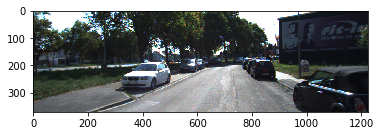

In [13]:
img, shift_h, shift_w = read_camera(base_path + 'data_object_image_3/training/image_3/'+ file_name + '.png',
                                            (370, 1224))
# img, shift_h, shift_w = read_camera('/Users/apple/Desktop/000001.png',
#                                             (370, 1224))
print(shift_h, shift_w)
plt.imshow(img)

In [13]:
img.shape

(370, 1224, 3)

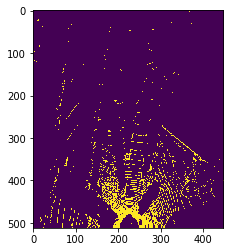

In [14]:
lidar_image = velo_points_bev(base_path + 'data_object_velodyne/training/velodyne/'+ file_name + '.bin', 
                           size=(512, 448, 32))
# lidar_image = velo_points_bev('/Users/apple/Downloads/000001.bin', size=(512, 448, 32))
plt.imshow(np.clip(np.mean(lidar_image, 2), 0, 1))

In [16]:
lidar_image.shape

(512, 448, 32)

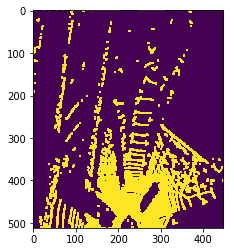

In [15]:
kernel = np.ones((5,5),np.uint8)
lidar_image_dil = cv2.dilate(lidar_image,kernel,iterations = 1)
plt.imshow(np.clip(np.mean(lidar_image_dil, 2), 0, 1))

In [37]:
all_data, label, Tr_velo_to_cam, R0_rect, P3 = read_label(base_path + 'training/label_2/'+ file_name + '.txt', 
                                                  base_path + 'data_object_calib/training/calib/'+ file_name + '.txt', 
                                                  shift_h, shift_w, size=(128*4, 112*4, 1*32))

In [35]:
all_data, label, Tr_velo_to_cam, R0_rect, P3 = read_label(base_path + 'training/label_2/'+ file_name + '.txt', 
                                                  base_path + 'data_object_calib/training/calib/'+ file_name + '.txt', 
                                                  shift_h, shift_w, size=(128, 112, 1))

In [32]:
label

array([[120.8178258 ,  61.14344503,   1.        ,   0.        ,
          2.30741624,   6.04913634,  -1.42      ],
       [102.83745319,  54.8337387 ,   1.        ,   0.        ,
          2.38792547,   7.1134439 ,   1.76      ],
       [100.26222677,  63.19892362,   1.        ,   0.        ,
          2.23315824,   5.8572979 ,  -1.44      ],
       [ 90.84359866,  64.30828221,   1.        ,   0.        ,
          2.44154299,   7.38829221,  -1.39      ],
       [ 81.53734038,  57.63139439,   1.        ,   0.        ,
          2.36615131,   6.81416122,   1.78      ],
       [ 72.06650676,  58.89445957,   1.        ,   0.        ,
          2.14385896,   6.01779012,   1.79      ],
       [ 79.36202861,  65.76216443,   1.        ,   0.        ,
          2.31249394,   7.8805296 ,  -1.4       ],
       [ 47.45797154,  64.6665529 ,   1.        ,   0.        ,
          2.14196737,   6.06163593,   2.02      ]])

In [21]:
# !cat /Users/apple/Desktop/Master/Data/training/label_2/000010.txt

In [137]:
import math
def rotate(origin, point, angle):
#     https://stackoverflow.com/questions/34372480/rotate-point-about-another-point-in-degrees-python
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

243.19927864160258 483.10164555352765
202.96256348347927 437.05845273822024
251.4767464526939 400.3936840796048
255.94416348118867 362.4966843742714
214.04167763878021 349.893432790237
220.4509511020223 308.70201284367624
261.79898647224616 316.29918599189705
239.0264961887641 206.15682447455399


<Figure size 432x288 with 0 Axes>

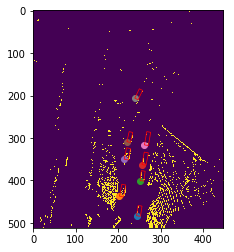

In [96]:
# Create figure and axes
plt.clf()
fig,ax = plt.subplots(1)

# Display the image
img = np.clip(np.mean(lidar_image[:, :, 9:], 2), 0, 1)
# img = cv2.resize(img, (112, 128))
ax.imshow(img)

for i in range(0, len(label)):
    w = label[i][5] 
    h = label[i][4] 
    x = label[i][0]
    y = label[i][1]
    plt.scatter(y, x)
#     print(label[i][6]*57.2958, y, x, w, h)
    print(y, x)
    rect = patches.Rectangle((y, x),w, h, angle= label[i][6]*57.2958,linewidth=0.75,edgecolor='r',facecolor='none')

    ax.add_patch(rect)
#     break

plt.show()


120.0 60.0
109.0 50.0
100.0 62.0
90.0 63.0
87.0 53.0
77.0 55.0
79.0 65.0
51.0 59.0


<Figure size 432x288 with 0 Axes>

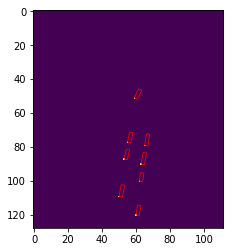

In [93]:
# Create figure and axes
plt.clf()
fig,ax = plt.subplots(1)

# Display the image
img = np.clip(np.mean(lidar_image[:, :, 9:], 2), 0, 1)
img = cv2.resize(img, (112, 128))
ax.imshow(img)
target = get_target(label)
ax.imshow(target[:, :, 1, -1])

for i in range(0, len(label)):
    w = label[i][5] // 4
    h = label[i][4] // 4
    x = label[i][0] // 4
    y = label[i][1] // 4
    print(x, y)
#     plt.scatter(y, x)
    rect = patches.Rectangle((y, x),w, h, angle= label[i][6]*57.2958,linewidth=0.75,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

plt.show()


In [94]:
target[51, 59]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.06702204,  0.2879879 ,  0.20963244,  1.3933576 ,  1.1885649 ,
         0.97065014, -2.6907964 ,  1.        ,  1.        ]],
      dtype=float32)

In [99]:
label[-1]

array([206.15682447, 239.02649619,  61.98854877,  32.40892897,
         8.62368879,  24.39220093,  -1.12      ])

In [103]:
(206.15682447/4 - 206.15682447//4)/8.04520593

0.06702204047870791

In [80]:
img.dtype

dtype('float64')

In [45]:
target.shape

(128, 112, 2, 9)

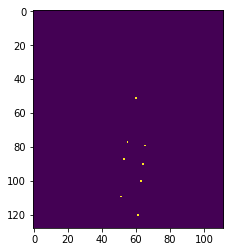

In [180]:
target = get_target(label)
plt.imshow(target[:, :, 1, -1])

<Figure size 432x288 with 0 Axes>

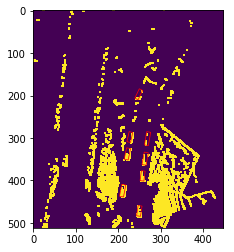

In [47]:
# Create figure and axes
plt.clf()
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(np.clip(np.mean(lidar_image_dil[:, :, 10:20], 2), 0, 1))

for i in range(len(label)-1, -1, -1):
    w = label[i][5] 
    h = label[i][4] 
    x = label[i][0]
    y = label[i][1]
    rect = patches.Rectangle((y, x),w, h, angle= label[i][6]*57.2958,linewidth=0.75,edgecolor='r',facecolor='none')

    ax.add_patch(rect)

plt.show()


<Figure size 432x288 with 0 Axes>

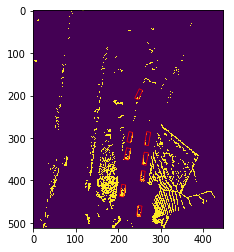

In [69]:
result_maxpool = model_maxpool.predict(np.array([lidar_image]))[0]
# result_maxpool = model_maxpool.predict(np.array([result_maxpool]))[0]
# result_maxpool = model_maxpool.predict(np.array([result_maxpool]))[0]
# Create figure and axes
plt.clf()
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(np.clip(np.mean(result_maxpool[:, :, 10:20], 2), 0, 1))

for i in range(len(label)-1, -1, -1):
    w = label[i][5] 
    h = label[i][4] 
    x = label[i][0]
    y = label[i][1]
    rect = patches.Rectangle((y, x),w, h, angle= label[i][6]*57.2958,linewidth=0.75,edgecolor='r',facecolor='none')

    ax.add_patch(rect)

plt.show()


<Figure size 432x288 with 0 Axes>

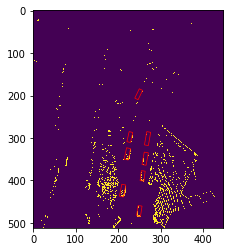

In [287]:
# # Create figure and axes
# plt.clf()
# fig,ax = plt.subplots(1)

# # Display the image
# ax.imshow(np.clip(np.mean(lidar_image[:, :, 10:20], 2), 0, 1))

# # Create a Rectangle patch
# # x_range=(0, 70)
# # y_range=(-40, 40)
# # z_range=(-2.5, 1)
# # size=(512, 448, 32)
# # x_size = (x_range[1] - x_range[0])
# # y_size = (y_range[1] - y_range[0])
# # z_size = (z_range[1] - z_range[0])
        
# # x_fac = (size[0]-1) / x_size
# # y_fac = (size[1]-1) / y_size
# # z_fac = (size[2]-1) / z_size


# # for i in range(len(all_data)):
# #         b = all_data[i]
# #         x0 = b[0][0]
# #         y0 = b[0][1]
# #         x1 = b[1][0]
# #         y1 = b[1][1]
# #         x2 = b[2][0]
# #         y2 = b[2][1]
# #         x3 = b[3][0]
# #         y3 = b[3][1]
# #         u0 = -(x0) * x_fac + 512
# #         v0 = -(y0 + 40) * y_fac + 448
# #         ax.scatter(v0, u0, s=3, color='w')
# #         u1 = -(x1) * x_fac + 512
# #         v1 = -(y1 + 40) * y_fac + 448
# #         ax.scatter(v1, u1, s=3, color='b')
# #         u2 = -(x2) * x_fac + 512
# #         v2 = -(y2 + 40) * y_fac + 448
# #         import math
# #         print(math.sqrt((v1-v2)**2 + (u1-u2)**2), math.sqrt((v1-v0)**2 + (u1-u0)**2))
# #         ax.scatter(v2, u2, s=3, color='g')
# #         u3 = -(x3) * x_fac + 512
# #         v3 = -(y3 + 40) * y_fac + 448
# #         ax.scatter(v3, u3, s=3, color='r')
        


# for i in range(len(label)-1, -1, -1):
#     w = label[i][5] 
#     h = label[i][4] 
#     x = label[i][0]
#     y = label[i][1]
#     rect = patches.Rectangle((y, x),w, h, angle= label[i][6]*57.2958,linewidth=0.75,edgecolor='r',facecolor='none')

#     ax.add_patch(rect)

# plt.show()


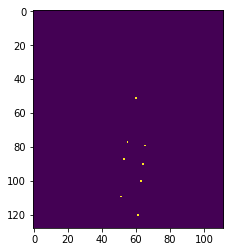

In [179]:
target = get_target(label)
plt.imshow(target[:, :, 1, -1])

In [154]:
# def test_points3d(lidar_path):
#     points = np.fromfile(lidar_path, dtype=np.float32).reshape(-1, 4)
#     x = points[:, 0]
#     y = points[:, 1]
#     z = points[:, 2]
#     return points3d(x, y, z)

In [37]:
# test_points3d('/Volumes/My Passport/Kitti_data/data_object_velodyne/training/velodyne/'+ file_name + '.bin')

In [39]:
''' Visualization code for point clouds and 3D bounding boxes with mayavi.
Modified by Charles R. Qi
Date: September 2017
Ref: https://github.com/hengck23/didi-udacity-2017/blob/master/baseline-04/kitti_data/draw.py
'''

import numpy as np
import mayavi.mlab as mlab

try:
    raw_input          # Python 2
except NameError:
    raw_input = input  # Python 3


def draw_lidar_simple(pc, color=None):
    ''' Draw lidar points. simplest set up. '''
    fig = mlab.figure(figure=None, bgcolor=(0,0,0), fgcolor=None, engine=None, size=(1600, 1000))
    if color is None: color = pc[:,2]
    #draw points
    mlab.points3d(pc[:,0], pc[:,1], pc[:,2], color, color=None, mode='point', colormap = 'gnuplot', scale_factor=1, figure=fig)
    #draw origin
    mlab.points3d(0, 0, 0, color=(1,1,1), mode='sphere', scale_factor=0.2)
    #draw axis
    axes=np.array([
        [2.,0.,0.,0.],
        [0.,2.,0.,0.],
        [0.,0.,2.,0.],
    ],dtype=np.float64)
    mlab.plot3d([0, axes[0,0]], [0, axes[0,1]], [0, axes[0,2]], color=(1,0,0), tube_radius=None, figure=fig)
    mlab.plot3d([0, axes[1,0]], [0, axes[1,1]], [0, axes[1,2]], color=(0,1,0), tube_radius=None, figure=fig)
    mlab.plot3d([0, axes[2,0]], [0, axes[2,1]], [0, axes[2,2]], color=(0,0,1), tube_radius=None, figure=fig)
    mlab.view(azimuth=180, elevation=70, focalpoint=[ 12.0909996 , -1.04700089, -2.03249991], distance=62.0, figure=fig)
    return fig

def draw_lidar(pc, color=None, fig=None, bgcolor=(0,0,0), pts_scale=1, pts_mode='point', pts_color=None):
    ''' Draw lidar points
    Args:
        pc: numpy array (n,3) of XYZ
        color: numpy array (n) of intensity or whatever
        fig: mayavi figure handler, if None create new one otherwise will use it
    Returns:
        fig: created or used fig
    '''
    pc = pc[pc[:, 0]<= 70]
    if fig is None: fig = mlab.figure(figure=None, bgcolor=bgcolor, fgcolor=None, engine=None, size=(1600, 1000))
    if color is None: color = pc[:,2]
#     print(pc.shape)
    mlab.points3d(pc[:,0], pc[:,1], pc[:,2], color, color=pts_color, mode=pts_mode, colormap = 'gnuplot', scale_factor=pts_scale, figure=fig)
    
    #draw origin
    mlab.points3d(0, 0, 0, color=(1,1,1), mode='sphere', scale_factor=0.2)
    
    #draw axis
    axes=np.array([
        [2.,0.,0.,0.],
        [0.,2.,0.,0.],
        [0.,0.,2.,0.],
    ],dtype=np.float64)
    mlab.plot3d([0, axes[0,0]], [0, axes[0,1]], [0, axes[0,2]], color=(1,0,0), tube_radius=None, figure=fig)
    mlab.plot3d([0, axes[1,0]], [0, axes[1,1]], [0, axes[1,2]], color=(0,1,0), tube_radius=None, figure=fig)
    mlab.plot3d([0, axes[2,0]], [0, axes[2,1]], [0, axes[2,2]], color=(0,0,1), tube_radius=None, figure=fig)

    # draw fov (todo: update to real sensor spec.)
    fov=np.array([  # 45 degree
        [20., 20., 0.,0.],
        [20.,-20., 0.,0.],
    ],dtype=np.float64)
    
    mlab.plot3d([0, fov[0,0]], [0, fov[0,1]], [0, fov[0,2]], color=(1,1,1), tube_radius=None, line_width=1, figure=fig)
    mlab.plot3d([0, fov[1,0]], [0, fov[1,1]], [0, fov[1,2]], color=(1,1,1), tube_radius=None, line_width=1, figure=fig)
   
    # draw square region
    TOP_Y_MIN=-20
    TOP_Y_MAX=20
    TOP_X_MIN=0
    TOP_X_MAX=40
    TOP_Z_MIN=-2.0
    TOP_Z_MAX=0.4
    
    x1 = TOP_X_MIN
    x2 = TOP_X_MAX
    y1 = TOP_Y_MIN
    y2 = TOP_Y_MAX
    mlab.plot3d([x1, x1], [y1, y2], [0,0], color=(0.5,0.5,0.5), tube_radius=0.1, line_width=1, figure=fig)
    mlab.plot3d([x2, x2], [y1, y2], [0,0], color=(0.5,0.5,0.5), tube_radius=0.1, line_width=1, figure=fig)
    mlab.plot3d([x1, x2], [y1, y1], [0,0], color=(0.5,0.5,0.5), tube_radius=0.1, line_width=1, figure=fig)
    mlab.plot3d([x1, x2], [y2, y2], [0,0], color=(0.5,0.5,0.5), tube_radius=0.1, line_width=1, figure=fig)
    
    #mlab.orientation_axes()
    mlab.view(azimuth=180, elevation=70, focalpoint=[ 12.0909996 , -1.04700089, -2.03249991], distance=62.0, figure=fig)
    return fig

def draw_gt_boxes3d(gt_boxes3d, fig, color=(1,1,1), line_width=1, draw_text=True, text_scale=(1,1,1), color_list=None):
    ''' Draw 3D bounding boxes
    Args:
        gt_boxes3d: numpy array (n,8,3) for XYZs of the box corners
        fig: mayavi figure handler
        color: RGB value tuple in range (0,1), box line color
        line_width: box line width
        draw_text: boolean, if true, write box indices beside boxes
        text_scale: three number tuple
        color_list: a list of RGB tuple, if not None, overwrite color.
    Returns:
        fig: updated fig
    ''' 
    num = len(gt_boxes3d)
    for n in range(num):
        b = gt_boxes3d[n]
        if color_list is not None:
            color = color_list[n] 
        if draw_text: mlab.text3d(b[4,0], b[4,1], b[4,2], '%d'%n, scale=text_scale, color=color, figure=fig)
        for k in range(0,4):
            #http://docs.enthought.com/mayavi/mayavi/auto/mlab_helper_functions.html
            i,j=k,(k+1)%4
            mlab.plot3d([b[i,0], b[j,0]], [b[i,1], b[j,1]], [b[i,2], b[j,2]], color=color, tube_radius=None, line_width=line_width, figure=fig)

            i,j=k+4,(k+1)%4 + 4
            mlab.plot3d([b[i,0], b[j,0]], [b[i,1], b[j,1]], [b[i,2], b[j,2]], color=color, tube_radius=None, line_width=line_width, figure=fig)

            i,j=k,k+4
            mlab.plot3d([b[i,0], b[j,0]], [b[i,1], b[j,1]], [b[i,2], b[j,2]], color=color, tube_radius=None, line_width=line_width, figure=fig)
    #mlab.show(1)
    #mlab.view(azimuth=180, elevation=70, focalpoint=[ 12.0909996 , -1.04700089, -2.03249991], distance=62.0, figure=fig)
    return fig


# pc = np.fromfile('/Volumes/My Passport/Kitti_data/data_object_velodyne/training/velodyne/'+ file_name + '.bin', dtype=np.float32).reshape(-1, 4)
pc = np.fromfile(base_path + 'data_object_velodyne/training/velodyne/'+ file_name + '.bin', dtype=np.float32).reshape(-1, 4)
fig = draw_lidar(pc)
mlab.savefig('pc_view.jpg', figure=fig)
raw_input()

m


'm'

## Apply maxpooling on the lidar data

In [24]:
model_maxpool = tf.keras.models.Sequential()
model_maxpool.add(tf.keras.layers.MaxPool2D((2, 2), strides=1, padding='same', input_shape=(512, 448, 32)))

In [25]:
model_maxpool.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d (MaxPooling2D) (None, 512, 448, 32)      0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [26]:
result_maxpool = model_maxpool.predict(np.array([lidar_image]))[0]

In [35]:
result_maxpool.shape

(512, 448, 32)

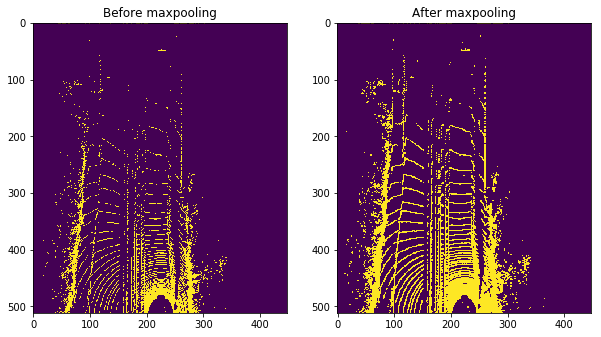

In [39]:
plt.figure(figsize=(10, 20))

plt.subplot(1,2,1)
plt.title('Before maxpooling')
plt.imshow(np.clip(np.mean(lidar_image, 2), 0, 1))

plt.subplot(1,2,2)
plt.title('After maxpooling')
plt.imshow(np.clip(np.mean(result_maxpool, 2), 0, 1))

NameError: name 'result_maxpool' is not defined

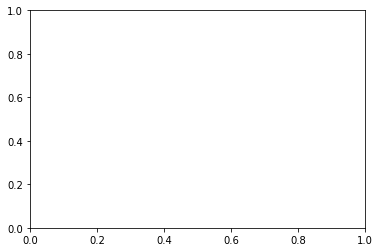

In [28]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(np.clip(np.mean(result_maxpool[:, :, 10:26], 2), 0, 1))

# Create a Rectangle patch
x_range=(0, 70)
y_range=(-40, 40)
z_range=(-2.5, 1)
size=(512, 448, 32)
x_size = (x_range[1] - x_range[0])
y_size = (y_range[1] - y_range[0])
z_size = (z_range[1] - z_range[0])
        
x_fac = (size[0]-1) / x_size
y_fac = (size[1]-1) / y_size
z_fac = (size[2]-1) / z_size

for i in range(len(label)):

    x = -label[i][0][0] * x_fac + 512
    y = -(label[i][1][0] + 40) * y_fac + 448
    w = label[i][5] * y_fac
    h = label[i][4] * x_fac
#     print(x, y, w, h)
    rect = patches.Rectangle((y, x),w, h, angle=label[i][6]*57.2958,linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
#     break

plt.show()


NameError: name 'lidar_image' is not defined

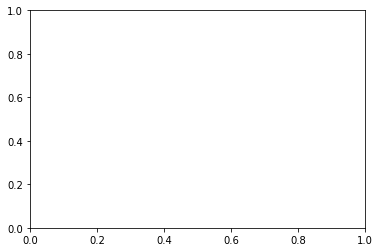

In [16]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(np.clip(np.mean(lidar_image[:, :, 10:26], 2), 0, 1))

# Create a Rectangle patch
x_range=(0, 70)
y_range=(-40, 40)
z_range=(-2.5, 1)
size=(512, 448, 32)
x_size = (x_range[1] - x_range[0])
y_size = (y_range[1] - y_range[0])
z_size = (z_range[1] - z_range[0])
        
x_fac = (size[0]-1) / x_size
y_fac = (size[1]-1) / y_size
z_fac = (size[2]-1) / z_size

for i in range(len(label)):

    x = -label[i][0][0] * x_fac + 512
    y = -(label[i][1][0] + 40) * y_fac + 448
    w = label[i][5] * y_fac
    h = label[i][4] * x_fac
#     print(x, y, w, h)
    rect = patches.Rectangle((y, x),w, h, angle=label[i][6]*57.2958,linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    break
#     break

plt.show()


## Testing the target label

In [259]:
target = get_target(label)

In [260]:
target.shape

(128, 112, 2, 9)

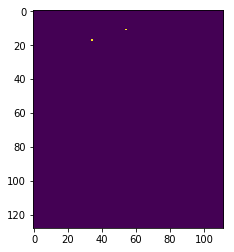

In [263]:
plt.imshow(target[:, :, 0, -1])

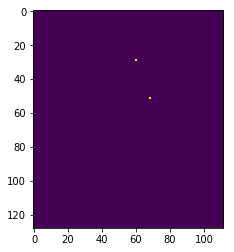

In [258]:
plt.imshow(target[:, :, 1, -1])

## Testing the Lidar branch

In [10]:
from models.pytorch_to_tf import *

In [11]:
trained_model = get_torch_model()

In [12]:
trained_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [21]:
trained_model.fc.weight.shape

torch.Size([1000, 512])

In [22]:
trained_model.fc.bias.shape

torch.Size([1000])

In [24]:
trained_model.fc.bias

Parameter containing:
tensor(1.00000e-02 *
       [-0.2634,  0.3000,  0.0656, -2.6909,  0.6364,  1.3260, -1.1178,
         2.0639, -0.3637, -1.2325, -1.2629, -0.7206, -1.9321, -2.4960,
        -1.1885, -0.8326, -0.9575, -1.6658,  0.9180, -1.5354,  0.7136,
         3.0737,  1.3239, -0.7753,  0.4745,  1.1175,  1.5949, -1.6712,
        -0.1013, -0.3717,  0.6527, -1.2041,  0.9043, -0.0833,  0.8865,
        -2.6307, -1.4588,  0.2943,  0.2972, -1.9125, -0.4792,  1.3828,
         0.9880, -1.8417,  1.9734,  0.1694,  1.2420, -0.5584, -1.0612,
         0.0398,  0.4273, -1.3298,  2.0661,  1.6963,  0.2795,  0.0742,
         1.3168,  0.3221,  1.0458,  1.6511,  0.0917,  0.3939, -0.5653,
         1.9372,  0.7524,  1.3437, -1.3185, -1.0026,  0.7192, -0.2317,
        -1.8895,  1.2519,  0.1958,  0.7384, -0.9666,  2.0189,  0.7665,
         1.8529,  1.5710,  1.8582, -0.6931,  1.7090,  0.9127, -3.8876,
        -2.4116, -0.6872, -1.1648,  0.7882,  0.1805,  2.8480, -1.9379,
        -1.6295,  1.0468, -1.3027,

In [8]:
train_inptus_rgb = tf.placeholder(tf.float32, 
                                                [None, 370, 1224, 3], 
                                                name='train_inputs_rgb')
cnn = ResNetBuilder().build(branch=1, img_height=370, img_width=1224, img_channels=3)
cnn.build_model(train_inptus_rgb)

In [9]:
cnn2 = ResNetBuilder().build(branch=3, img_height=370, img_width=1224, img_channels=32)
cnn2.build_model(train_inptus_rgb)

In [10]:
cnn.res_groups

[<tf.Tensor 'network/resblock_11/Relu_1:0' shape=(?, 93, 306, 64) dtype=float32>,
 <tf.Tensor 'network/resblock_22/Relu_1:0' shape=(?, 47, 153, 128) dtype=float32>,
 <tf.Tensor 'network/resblock_32/Relu_1:0' shape=(?, 24, 77, 256) dtype=float32>,
 <tf.Tensor 'network/resblock_42/Relu_1:0' shape=(?, 12, 39, 512) dtype=float32>]

In [11]:
cnn2.res_groups

[<tf.Tensor 'network_fv/resblock1_1/Relu_1:0' shape=(?, 93, 306, 64) dtype=float32>,
 <tf.Tensor 'network_fv/resblock2_1/Relu_1:0' shape=(?, 47, 153, 128) dtype=float32>,
 <tf.Tensor 'network_fv/resblock3_1/Relu_1:0' shape=(?, 24, 77, 256) dtype=float32>,
 <tf.Tensor 'network_fv/resblock4_1/Relu_1:0' shape=(?, 12, 39, 512) dtype=float32>]

In [18]:
tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                                      "lidar_branch/")  

[]

In [21]:
?tf.contrib.graph_editor.filter_ops

In [26]:
# vars_ = tf.contrib.graph_editor.get_tensors(model.graph)
# vars_

In [1]:
model = Model()

NameError: name 'Model' is not defined

In [120]:
%%time
trainer = Trainer(model=model, data_base_path='/Users/apple/Desktop/Master/Data')

trainer.train_bev(batch_size=1, 
                epochs=1, 
                alpha=0.5)

Loss at batch 1 = 4.224826335906982
1.9892108 0.01950348 2.216112
Model saved in path: /tmp/model.ckpt-1
CPU times: user 1min 22s, sys: 9.81 s, total: 1min 32s
Wall time: 38.9 s


In [27]:
# %%time
# model.train(batch_size=1);

CPU times: user 1min 4s, sys: 7.51 s, total: 1min 11s
Wall time: 25.1 s


In [14]:
vars_ = tf.contrib.graph_editor.get_tensors(model.graph)
def calc_size(var): 
#     print(var)
    try:
        shape_dims = var.get_shape().as_list()
        j = 1
        if shape_dims is not None:
            for i in shape_dims:
                if type(i) ==type(1):
                    j *= i
        if 'float32' in str(var.dtype):
            j = j * 32
        elif var.dtype == tf.int32:
            j = j * 32
        elif var.dtype == tf.int16:
            j = j * 16
        if j * 1.25e-10 >= 0.5:
            print(var, j*1.25e-10)
        return j
    except:
        return 1
sum(list(map(lambda var: calc_size(var), vars_))) * 1.25e-10

11.155336665375001

In [55]:
len(vars_)

12307

In [86]:
kdtrees = model.kdtrees

In [23]:
model.fpn_images

[<tf.Tensor 'fpn_rgb/conv1_0/conv2d/BiasAdd:0' shape=(?, 96, 312, 256) dtype=float32>,
 <tf.Tensor 'fpn_rgb/conv1_1/conv2d/BiasAdd:0' shape=(?, 48, 156, 256) dtype=float32>,
 <tf.Tensor 'fpn_rgb/conv1_2/conv2d/BiasAdd:0' shape=(?, 24, 78, 256) dtype=float32>,
 <tf.Tensor 'fpn_rgb/conv1_3/conv2d/BiasAdd:0' shape=(?, 12, 39, 256) dtype=float32>]

In [12]:
cnn_res_groups = model.cnn.res_groups
lidar_res_groups = model.cnn_lidar.res_groups

In [14]:
cnn_res_groups[0]

<tf.Tensor 'network/resblock_11/Relu_1:0' shape=(?, 93, 306, 64) dtype=float32>

In [15]:
lidar_res_groups[0]

<tf.Tensor 'network_lidar/resblock1_3/Relu_1:0' shape=(?, 256, 224, 64) dtype=float32>

In [16]:
fl = AttentionFusionLayer(cnn_res_groups[0], lidar_res_groups[0])

In [18]:
fl

In [19]:
len(lidar_res_groups)

4

In [20]:
len(cnn_res_groups)

4

In [51]:
model.kdtrees = kdtrees

In [ ]:
final_output, loss = model.train()

Generating the kdtree
Start training


In [46]:
kdtrees.shape

(1, 512, 448, 32, 1, 4)

In [35]:
final_output[0].shape

(128, 112, 2, 9)

In [36]:
np.min(final_output)

-45.331207

In [37]:
np.max(final_output)

45.05166

In [38]:
loss

5.580457

In [163]:
kdtrees = model.kdtrees